In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# Challenge - What do you see?

https://courses.thinkful.com/data-201-prepv1/project/2.2.4

# Data Sources
## UN data:
http://data.un.org/Explorer.aspx

<> Energy Statistics Database - crude oil exports

<> UNODC Homicide Statistics 2012


In [2]:
oil_ex = pd.read_csv('data/UN/crude_oil_exports.csv')

In [3]:
homicide = pd.read_csv('data/UN/homicide.csv')

In [5]:
# not used: oil production
# oil_prod = pd.read_csv('data/UN/crude_oil_production.csv')

## Hypothesis

With UN country data on export volume and homicide rates, the hypothesis is that among the major oil-exporting nations (particularly those whose economies are predominantly reliant on oil), there would be an inverse relationship between export volume and homicides. With more exports, there's more profit and therefore more general economic stability, showing its way through lower levels of violent crime.

## Data Exploration and Manipulation

In [4]:
# source: http://www.worldstopexports.com/worlds-top-oil-exports-country/
oil_exporting_nations = ['Saudi Arabia', 'Russia', 'Iraq', 'Canada', 'UAE', 
    'Kuwait', 'Iran', 'Nigeria', 'Angola', 'Norway', 
    'Venezuela', 'Kazakhstan', 'Mexico', 'Qatar', 'United Kingdom'] 

#### testing smaller subsets to get the right code

In [6]:
test_nations = ['Algeria']

In [7]:
testdf = oil_ex.head(12)

# Question for mentor

In [8]:
# Is there a better way to perform this without a loop?
country_in_test_nations = []
for i in range(len(testdf)):
    country_in_test_nations.append(testdf['Country or Area'][i] in test_nations)

In [11]:
testdf['nations of interest'] = country_in_test_nations

C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [ ]:
testdf

In [13]:
testdf[testdf['nations of interest']]

,Country or Area,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes,nations of interest
11,Algeria,Conventional crude oil - exports,2014.0,"Metric tons, thousand",23550.0,NaN,True


Success.  Only one row was intended to be selected in.

#### small test step complete

Successfully cropped rows for 'nations of interest'='Algeria'.
Now to test for 3 nations of interest.


In [5]:
df = oil_ex

testdf = df.head(75)

test_nations = ['Algeria', 'Angola', 'Argentina']

In [32]:
# Is there a better way to perform this without a loop?
country_in_test_nations = []
for i in range(len(testdf)):
    country_in_test_nations.append(testdf['Country or Area'][i] in test_nations)

testdf['nations of interest'] = country_in_test_nations

In [35]:
len(testdf)

75

In [36]:
len(testdf[testdf['nations of interest']])

64

The above indicates that intended rows were selected out.

#### another test step done

3 nations worked. Now try all 15.

In [6]:
# Is there a better way to perform this without a loop?
country_in_select_nations = []
for i in range(len(oil_ex)):
    country_in_select_nations.append(oil_ex['Country or Area'][i] in oil_exporting_nations)

oil_ex['nations of interest'] = country_in_select_nations

#len(oil_ex)

oil_ex_only = oil_ex[oil_ex['nations of interest']]

#len(oil_ex_only)

In [10]:
# super short-hand
dfx = oil_ex_only
#dfp = oil_prod_only

In [7]:
oil_ex_only['Country or Area'].value_counts()

Iraq              25
Angola            25
Kuwait            25
Canada            25
Saudi Arabia      25
Norway            25
Nigeria           25
Mexico            25
Qatar             25
United Kingdom    25
Kazakhstan        23
Name: Country or Area, dtype: int64

### Repeat operation with oil production

In [54]:
#print(oil_prod.size)
#print(len(oil_prod))
#print("# of columns is {}".format((oil_prod.size)/(len(oil_prod))))

14238
2373
# of columns is 6.0


In [56]:
# Is there a better way to perform this without a loop?
country_in_select_nations = []
for i in range(len(oil_prod)):
    country_in_select_nations.append(oil_prod['Country or Area'][i] in oil_exporting_nations)

oil_prod['nations of interest'] = country_in_select_nations

oil_prod_only = oil_prod[oil_prod['nations of interest']]

In [11]:
# decided not to include production oil after all

# frames = [dfx, dfp]
# df_all_oil = pd.concat(frames)
df_all_oil = dfx

### now for the homicide data

In [12]:
# Is there a better way to perform this without a loop?
country_in_select_nations = []
for i in range(len(homicide)):
    country_in_select_nations.append(homicide['Country or Area'][i] in oil_exporting_nations)

homicide['nations of interest'] = country_in_select_nations
dfh = homicide[homicide['nations of interest']]

In [13]:
df_homicides = dfh

### Trim unwanted columns

In [91]:
s='Unit'
df_all_oil[s].value_counts()

Metric tons,  thousand    546
Name: Unit, dtype: int64

In [93]:
df_all_oil.head(1)

,Country or Area,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes,nations of interest
36,Angola,Conventional crude oil - exports,2014.0,"Metric tons, thousand",81274.0,NaN,True


In [94]:
df_homicides.head(1)

,Country or Area,Year,Count,Rate,Source,Source Type,nations of interest
20,Angola,2008,3426,19.0,WHO,PH,True


In [95]:
df_backup_all_oil = df_all_oil
df_backup_homicides = df_homicides

In [14]:
df_all_oil.drop(['Unit', 'Quantity Footnotes', 'nations of interest'], axis=1)
df_homicides.drop(['Source', 'Source Type', 'nations of interest'], axis=1)
print("done")

done


### end of Data Exploration and Manipulation

# Data Visualization

In [101]:
dfx.head(1)

,Country or Area,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes,nations of interest
36,Angola,Conventional crude oil - exports,2014.0,"Metric tons, thousand",81274.0,NaN,True


In [113]:
# dfp.head(1)

In [114]:
df_all_oil['Commodity - Transaction'].value_counts()

Conventional crude oil - exports    273
Name: Commodity - Transaction, dtype: int64

### Select one country per data frame.

#### PROBLEM
Many countries have insufficient homicide data:

In [14]:
df_homicides['Country or Area'].value_counts()

Norway          16
Kazakhstan      16
Mexico          16
Canada          16
Saudi Arabia     9
Qatar            9
Kuwait           6
Iraq             1
Angola           1
Nigeria          1
Name: Country or Area, dtype: int64

Missing data countries: Russia, 
(UAE because of a naming entry error on my part. A bit tedious to fix now.)

In [20]:
# SAU_x = df_all_oil[df_all_oil['Country or Area']=='Saudi Arabia']
KAZ_x = df_all_oil[df_all_oil['Country or Area']=='Kazakhstan']
MEX_x = df_all_oil[df_all_oil['Country or Area']=='Mexico']
CAN_x = df_all_oil[df_all_oil['Country or Area']=='Canada']
#GBR_x = df_all_oil[df_all_oil['Country or Area']=='United Kingdom']
NOR_x = df_all_oil[df_all_oil['Country or Area']=='Norway']

# SAU_h = df_homicides[df_homicides['Country or Area']=='Saudi Arabia']
KAZ_h = df_homicides[df_homicides['Country or Area']=='Kazakhstan']
MEX_h = df_homicides[df_homicides['Country or Area']=='Mexico']
CAN_h = df_homicides[df_homicides['Country or Area']=='Canada']
#GBR_h = df_homicides[df_homicides['Country or Area']=='United Kingdom']
NOR_h = df_homicides[df_homicides['Country or Area']=='Norway']

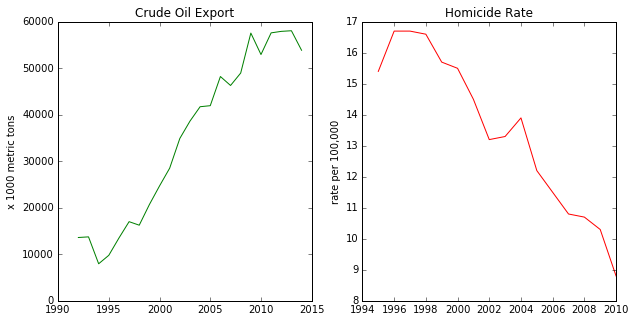

In [21]:
# Kazakhstan

years = KAZ_x['Year']
KAZ_x.index = years
years = KAZ_h['Year']
KAZ_h.index = years

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(KAZ_x['Quantity'], color='green')
plt.ylabel('x 1000 metric tons')
plt.title('Crude Oil Export')

plt.subplot(1, 2, 2)
plt.plot(KAZ_h['Rate'], color='red')
plt.ylabel('rate per 100,000')
plt.title('Homicide Rate')

plt.show()

# Kazakhstan

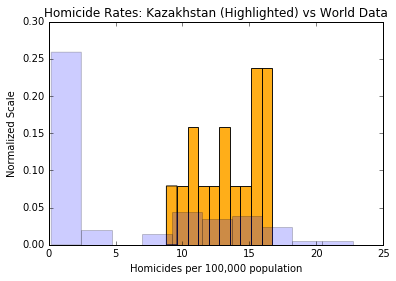

In [33]:
plt.hist(KAZ_h['Rate'], normed=True, alpha=0.9, color='orange')
plt.hist(df_homicides['Rate'], normed=True, alpha=0.2, color='blue')
plt.title('Homicide Rates: Kazakhstan (Highlighted) vs World Data')
plt.ylabel('Normalized Scale')
plt.xlabel('Homicides per 100,000 population')
plt.show()

In [172]:
# homicide[homicide['Country or Area']=='United States of America']

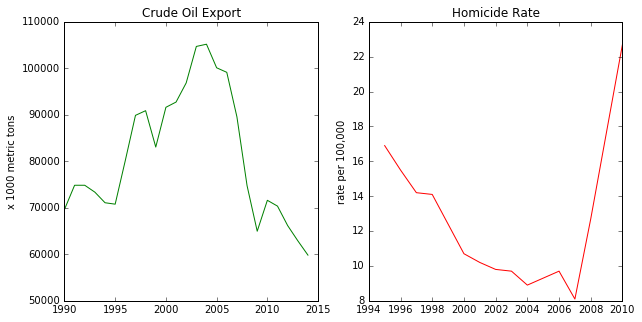

In [173]:
# Mexico

years = MEX_x['Year']
MEX_x.index = years
years = MEX_h['Year']
MEX_h.index = years

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(MEX_x['Quantity'], color='green')
plt.ylabel('x 1000 metric tons')
plt.title('Crude Oil Export')

plt.subplot(1, 2, 2)
plt.plot(MEX_h['Rate'], color='red')
plt.ylabel('rate per 100,000')
plt.title('Homicide Rate')

plt.show()

# Mexico

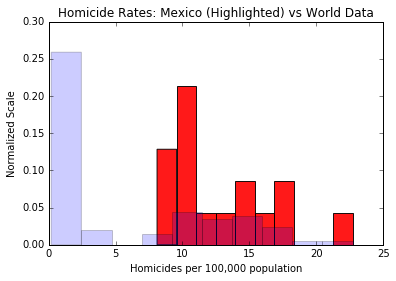

In [34]:
plt.hist(MEX_h['Rate'], normed=True, alpha=0.9, color='red')
plt.hist(df_homicides['Rate'], normed=True, alpha=0.2, color='blue')
plt.title('Homicide Rates: Mexico (Highlighted) vs World Data')
plt.ylabel('Normalized Scale')
plt.xlabel('Homicides per 100,000 population')
plt.show()

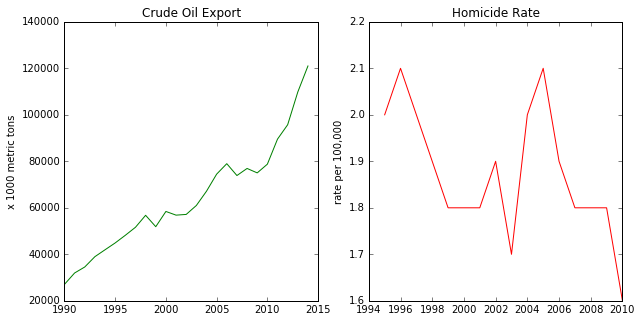

In [174]:
# Canada

years = CAN_x['Year']
CAN_x.index = years
years = CAN_h['Year']
CAN_h.index = years

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(CAN_x['Quantity'], color='green')
plt.ylabel('x 1000 metric tons')
plt.title('Crude Oil Export')

plt.subplot(1, 2, 2)
plt.plot(CAN_h['Rate'], color='red')
plt.ylabel('rate per 100,000')
plt.title('Homicide Rate')

plt.show()

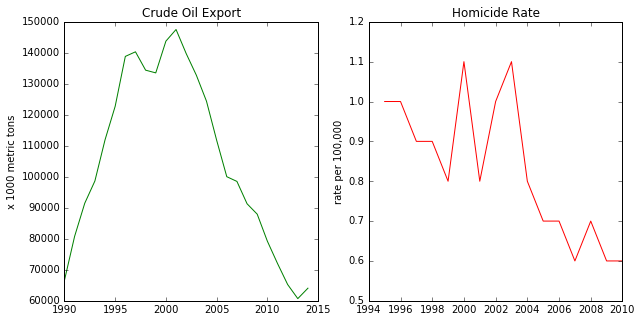

In [176]:
# Norway

years = NOR_x['Year']
NOR_x.index = years
years = NOR_h['Year']
NOR_h.index = years

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(NOR_x['Quantity'], color='green')
plt.ylabel('x 1000 metric tons')
plt.title('Crude Oil Export')

plt.subplot(1, 2, 2)
plt.plot(NOR_h['Rate'], color='red')
plt.ylabel('rate per 100,000')
plt.title('Homicide Rate')

plt.show()


## Normal curves on homicide rates

In [18]:
KAZ_h

,Country or Area,Year,Count,Rate,Source,Source Type,nations of interest
816,Kazakhstan,2010,1418,8.8,Transmonee,CJ,True
817,Kazakhstan,2009,1638,10.3,Transmonee,CJ,True
818,Kazakhstan,2008,1680,10.7,Transmonee,CJ,True
819,Kazakhstan,2007,1677,10.8,Transmonee,CJ,True
820,Kazakhstan,2006,1760,11.5,Transmonee,CJ,True
821,Kazakhstan,2005,1848,12.2,Transmonee,CJ,True
822,Kazakhstan,2004,2091,13.9,Transmonee,CJ,True
823,Kazakhstan,2003,1991,13.3,Transmonee,CJ,True
824,Kazakhstan,2002,1967,13.2,Transmonee,CJ,True
825,Kazakhstan,2001,2160,14.5,Transmonee,CJ,True
